In [107]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
import pandas as pd
from datetime import timedelta
import math

In [352]:
import keras

In [353]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [354]:
x_train.shape

(60000, 28, 28)

In [355]:
print(len(x_test))
print(len(y_test))

import random
import numpy
idxs = []
for x in range(2000):
    idxs.append(random.randint(1,10000)) 
print(len(idxs))

x_cv = x_test[idxs]
y_cv = y_test[idxs]

print(len(x_cv))
print(len(y_cv))

10000
10000
2000
2000
2000


In [356]:
for i in sorted(idxs, reverse=True):
    x_test = numpy.delete(x_test, i, axis = 0)
    y_test = numpy.delete(y_test, i, axis = 0)

print(len(x_test))
print(len(y_test))

####
# x_train, y_train, x_test, y_test, x_cv, y_cv
####

8000
8000


In [357]:
x_train.shape

(60000, 28, 28)

In [358]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [359]:
x_test.shape

(8000, 28, 28)

In [360]:
x_train = x_train  / 255.0

x_test = x_test / 255.0

In [361]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(60, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [362]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [363]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.3156 - acc: 0.9109
Epoch 2/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.1581 - acc: 0.9534
Epoch 3/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.1141 - acc: 0.9660
Epoch 4/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.0907 - acc: 0.9732
Epoch 5/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.0747 - acc: 0.9775


In [364]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

8000/8000 [==============================] - 1s 105us/step
Test accuracy: 0.971125


In [375]:
cv_loss, cv_acc = model.evaluate(x_cv, y_cv)

print('CV accuracy:', cv_acc)

2000/2000 [==============================] - 0s 46us/step
CV accuracy: 0.9695


In [365]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(1)

In [366]:
#from sklearn.metrics import multilabel_confusion_matrix

In [367]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[786,   0,   1,   1,   2,   0,   0,   0,   2,   0],
       [  0, 895,   3,   0,   0,   0,   2,   1,   5,   0],
       [  4,   1, 794,   3,   2,   1,   1,   4,   6,   0],
       [  0,   0,   8, 796,   2,   1,   0,   4,   4,   5],
       [  0,   0,   6,   0, 764,   0,   4,   2,   1,   6],
       [  3,   0,   1,  13,   1, 680,   7,   0,   7,   5],
       [  5,   2,   0,   0,   3,   3, 763,   0,   3,   0],
       [  1,   3,  11,   0,   3,   0,   0, 798,   1,  13],
       [  4,   0,   5,   7,   2,   4,   2,   3, 726,   3],
       [  2,   2,   0,   5,  16,   2,   1,   6,   0, 767]], dtype=int64)

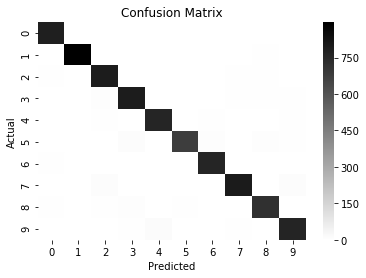

In [368]:
sns.heatmap(cm, cmap='gray_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix");

In [369]:
y_pred_train=model.predict(x_train)
y_pred_train= y_pred_train.argmax(1)
cm_train= confusion_matrix(y_train,y_pred_train)
cm_train

array([[5879,    0,    8,    1,    7,    0,   10,    1,   16,    1],
       [   0, 6668,   17,    3,   14,    0,    2,   11,   22,    5],
       [   7,    3, 5909,    5,    7,    0,    1,    9,   12,    5],
       [   5,    8,   59, 5948,    6,   16,    4,   22,   36,   27],
       [   0,    4,    3,    0, 5803,    0,    7,    2,    4,   19],
       [  11,    5,    5,   62,   14, 5207,   32,    5,   47,   33],
       [   9,   10,    2,    0,   13,    6, 5865,    0,   13,    0],
       [   5,    8,   40,    1,   21,    0,    0, 6127,   12,   51],
       [  11,   20,   16,   13,   18,    8,    8,    4, 5719,   34],
       [  11,    1,    2,   13,   79,    6,    3,   23,   14, 5797]],
      dtype=int64)

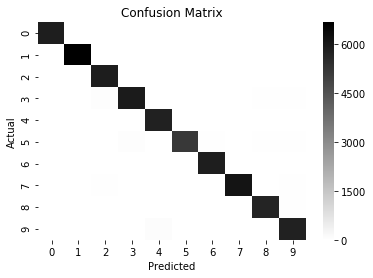

In [370]:
sns.heatmap(cm_train, cmap='gray_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix");

In [371]:
acc_train=accuracy_score(y_train,y_pred_train)
acc_train

0.9820333333333333

[[186   0   0   0   1   0   2   1   0   0]
 [  0 230   0   0   0   1   1   0   3   0]
 [  0   1 221   0   1   0   1   0   1   0]
 [  0   0   0 189   0   0   0   0   1   1]
 [  1   0   0   0 193   0   0   0   0   0]
 [  1   0   0   7   1 163   1   0   1   0]
 [  2   1   0   1   2   0 174   0   0   1]
 [  0   0   2   2   1   0   0 182   2   4]
 [  1   0   3   3   2   0   1   0 210   2]
 [  0   0   0   1   2   0   0   0   1 191]]


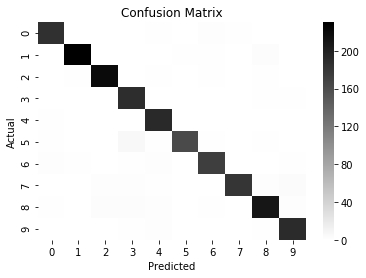

In [372]:
y_pred_cv=model.predict(x_cv)
y_pred_cv= y_pred_cv.argmax(1)
cm_cv= confusion_matrix(y_cv,y_pred_cv)
print(cm_cv)

sns.heatmap(cm_cv, cmap='gray_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix");

In [373]:
acc_cv=accuracy_score(y_cv,y_pred_cv)
acc_cv

0.9695